In [21]:
# Import Libraries

import os
import numpy as np
import matplotlib.pyplot as plt 

from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [22]:
# Use the mnist dataset contains into tf.keras.datasets and split it into a train and test samples

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# print train and test datasets size
print(f'x_train and y_train size:{x_train.shape, y_train.shape}')
print(f'x_test and y_test size:{x_test.shape, y_test.shape}')

x_train and y_train size:((60000, 28, 28), (60000,))
x_test and y_test size:((10000, 28, 28), (10000,))


In [23]:
# Write the number of groups of images (from 0 to 9) and the input shape into a variables

num_classes = 10
input_shape = (28, 28, 1)

In [24]:
# Reshape dataset to have a single color channel

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [25]:
# Convert vector classes to binary matrices

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [26]:
# Normalizing x_train and x_test data

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'Размер train')
print(x_test.shape[0], 'Размер test')

60000 Размер train
10000 Размер test


In [27]:
# Create and compiling a model with two 2D convolution layers, Flatten and Dense layer. Take categorical_crossentropy as a loss 
# function and accuracy as a metric.

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# Fit model on 8 epochs with a batch size of 250.

hist = model.fit(x_train, y_train, batch_size = 250, epochs=8, verbose=1, validation_data=(x_test, y_test))
print('Model is succsessfully fitted')
# Save model to be able to call later and predict without fitting
model.save('mnist.h5')
print('Model saved as mnist.h5')

Epoch 1/8
240/240 [==============================] - 5s 17ms/step - loss: 0.2504 - accuracy: 0.9286 - val_loss: 0.0696 - val_accuracy: 0.9784
Epoch 2/8
240/240 [==============================] - 4s 16ms/step - loss: 0.0661 - accuracy: 0.9801 - val_loss: 0.0543 - val_accuracy: 0.9816
Epoch 3/8
240/240 [==============================] - 4s 16ms/step - loss: 0.0475 - accuracy: 0.9856 - val_loss: 0.0515 - val_accuracy: 0.9830
Epoch 4/8
240/240 [==============================] - 4s 16ms/step - loss: 0.0373 - accuracy: 0.9890 - val_loss: 0.0453 - val_accuracy: 0.9851
Epoch 5/8
240/240 [==============================] - 4s 16ms/step - loss: 0.0292 - accuracy: 0.9909 - val_loss: 0.0437 - val_accuracy: 0.9870
Epoch 6/8
240/240 [==============================] - 4s 16ms/step - loss: 0.0243 - accuracy: 0.9925 - val_loss: 0.0541 - val_accuracy: 0.9826
Epoch 7/8
240/240 [==============================] - 4s 16ms/step - loss: 0.0190 - accuracy: 0.9941 - val_loss: 0.0486 - val_accuracy: 0.9864
Epoch 

In [29]:
# Print result

score = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', round(score[0], 4))
print('test accuracy:', round(score[1], 4))

test loss: 0.0447
test accuracy: 0.987


In [45]:
# Create a function that will process a custom image into an array, reshape array, that is bring the image to the required input 
# shape, as well as perform inversion and normalization

def preparation(im):
    conv_img = image.img_to_array(im)
    conv_img = conv_img.astype('float32')
    # reshape the image 
    conv_img = np.expand_dims(conv_img, axis=0)
    # inverse and normalize image array
    conv_img = 255-conv_img
    conv_img /= 255
    return conv_img

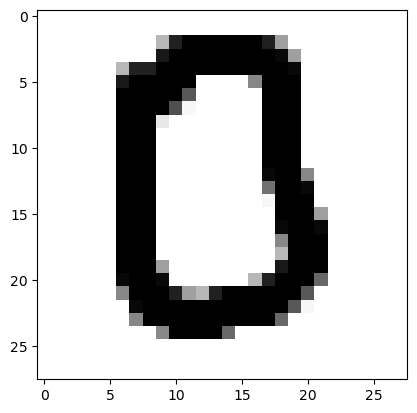

model result - 0
-------------------------------------------------------


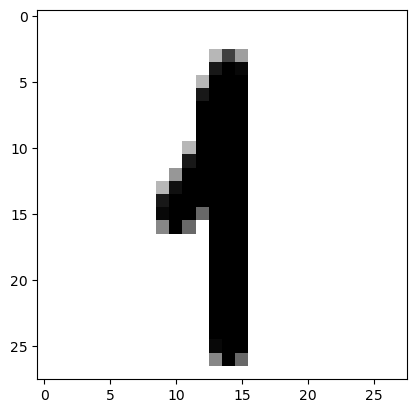

model result - 1
-------------------------------------------------------


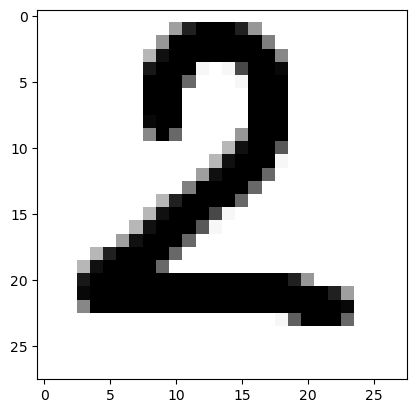

model result - 2
-------------------------------------------------------


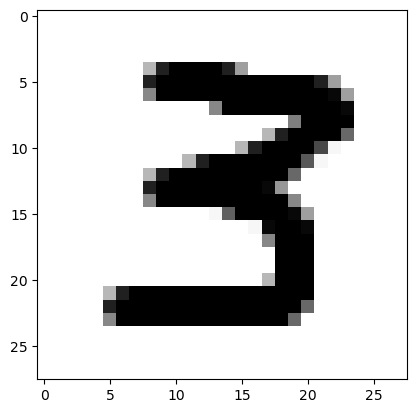

model result - 3
-------------------------------------------------------


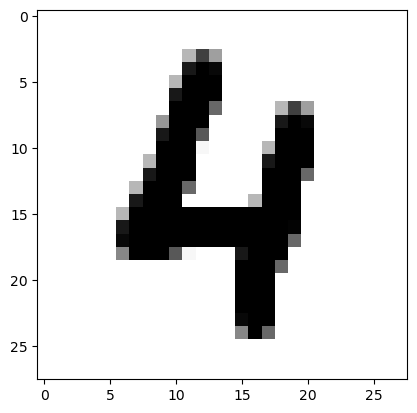

model result - 4
-------------------------------------------------------


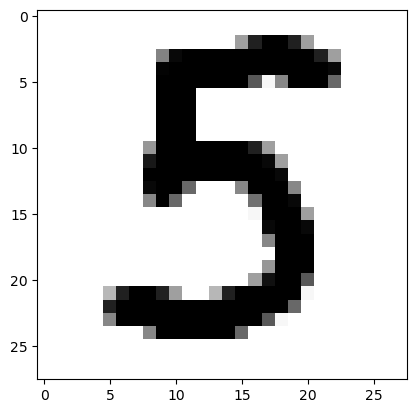

model result - 5
-------------------------------------------------------


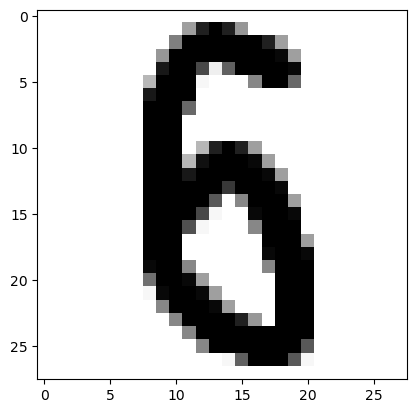

model result - 6
-------------------------------------------------------


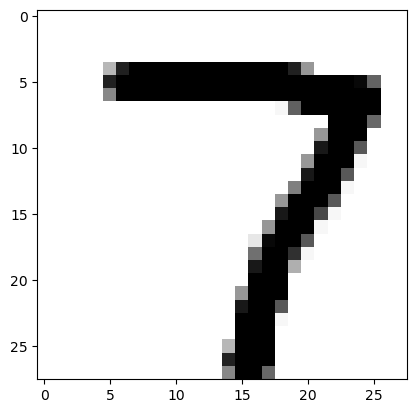

model result - 7
-------------------------------------------------------


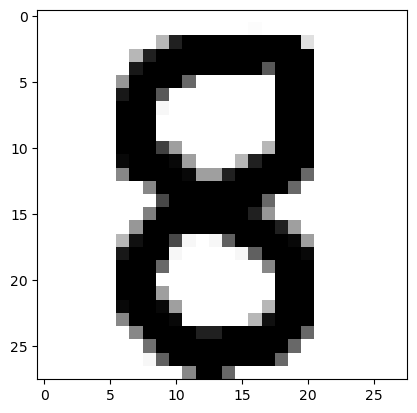

model result - 8
-------------------------------------------------------


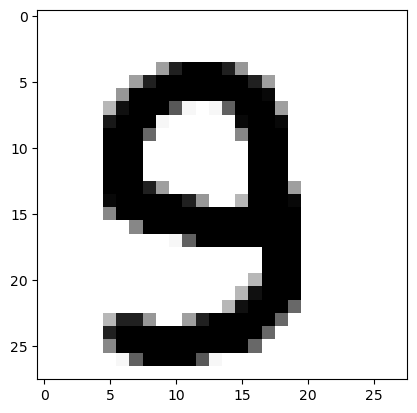

model result - 9
-------------------------------------------------------


In [52]:
# Checking the model on a custom pictures made in MS Paint

# Load the images, change the size to 28x28, format to grayscale
path = 'C:/Users/Konstantin/Documents/Стажировка Lets Grow More/Task 7/'
for _, _, files in os.walk(path, topdown=False):
        for file in files:
            if file.endswith('.png'):
                img = image.load_img(file, target_size=(28, 28), color_mode = "grayscale")
                plt.imshow(img.convert('RGBA'))
                plt.show();
                # Perform images preparation
                x = preparation(img)
                # Make predict and print image and prediction
                prediction = model.predict(x, verbose=0)
                prediction = np.argmax(prediction)
                print(f'model result - {prediction}\n{"-" * 55}')